#Comparison of multi-dimensional capabilities: an exometabolomics case study.
For a set of *organisms* we have measured for each organism a *phenotype*.  The *phenotype* is a boolean list of whether or not they are able to use a *resource*. From this data, we would like to show the relatedness of each organism to one another.  We'll use the *city block* distance function and *average* linkage to perform one-dimensional hierarchical clustering.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

#An example where there are four *organisms* and two *resources*

To determine an ability to utilize a *resource*, the environment after having an organism living in the environment is compared to a control *environment*.

This results in *M*, an [*m*, *n*] matrix of boolean values for *m* *organisms* and *n* *resources* . The values in *M* will be either 0 or 1 representing not-significant or taken up respectively .  

Of course, we must not believe that *not-significant* implies it *can not* utilize this resource, but given that typically, at least one-hundred metabolites are measured in each experiment, these effects will average out.

For example, if **four strains** have the following observation for two resources **0** for not-sigificant and **1** for decreased.  We can specify the observation for *Organism<sub>i</sub>* and *Organism<sub>j</sub>*.

In [2]:
M = [[0,0],
     [0,1],
     [1,0],
     [1,1]]

We need to compute the distance between each strain.  For this example these would be the distances:

* *Organism<sub>0</sub>* to *Organism<sub>1</sub>* is 1
* *Organism<sub>0</sub>* to *Organism<sub>2</sub>* is 1
* *Organism<sub>0</sub>* to *Organism<sub>3</sub>* is 2
* *Organism<sub>1</sub>* to *Organism<sub>2</sub>* is 2
* *Organism<sub>1</sub>* to *Organism<sub>3</sub>* is 1
* *Organism<sub>2</sub>* to *Organism<sub>3</sub>* is 1

This distance is referred to as *city block*, *Manhattan*, *box car*, or *absolute value* distance.
$$d_{ij}=\sum ^{n}_{k=1}\left| M_{ik}-M_{jk}\right| $$
Where *d<sub>ij</sub>* is the distance between two *organisms*, *i* and, *j* and *k* is the index of each *resource*.

In [3]:
dists = pdist(M,'cityblock')
print dists

[ 1.  1.  2.  2.  1.  1.]


In [4]:
Y = linkage(dists, method='average')
print Y
# A 4 by (n-1) matrix Z is returned.
# At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. 
# A cluster with an index less than n corresponds to one of the n original observations.
# The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2].
# The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

[[ 0.   1.   1.   2. ]
 [ 2.   3.   1.   2. ]
 [ 4.   5.   1.5  4. ]]


In [5]:
def augmented_dendrogram(*args, **kwargs):
    '''
    Variation on SciPy dendrogram to show the distance separating each cluster.
    http://stackoverflow.com/questions/11917779/how-to-plot-and-annotate-hierarchical-clustering-dendrograms-in-scipy-matplotlib
    Inputs are same as SciPy dendrogram
    '''
    ddata = dendrogram(*args, **kwargs)
    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata

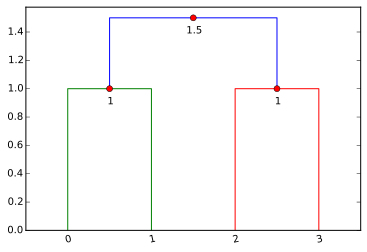

In [6]:
d = augmented_dendrogram(Y)

#The linkage shown in the dendrogram above uses the *average* method

The *average* or *Unweighted Pair Group Method with Arithmetic Mean* (UPGMA) method builds distances in a bottom up manner out of the pair-wise distance matrix.

The distance between the pairs 0&1 and 2&3 match the distance calculation shown above.  Where the *average* method comes into importance is how to estimate the similarity between 2&1, 2&0, 3&1, and 3&0.  The *naieve* basis of the *average* method suggest that the distance between 2&1 and 2&0 would be the average of the distance from 2&0 and 2&1.  Thus in the plot above this is shown as 1.5.  The distance from 2 to 1 is 1 and from 2 to 0 is 2 (average = 1.5).

#Increase the number of *organisms* and *resources* to test our understanding

In [7]:
M = [[0,0,0,0],
     [0,0,0,1],
     [0,0,1,0],
     [0,0,1,1],
     [1,0,0,0],
     [1,1,0,0],
     [1,1,1,0],
     [1,1,1,1]]

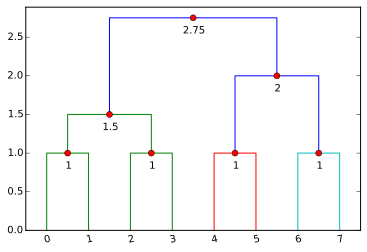

In [8]:
dists = pdist(M,'cityblock')
Y = linkage(dists, method='average')
d = augmented_dendrogram(Y)

#From this, let's understand the distance from *organism #7* to *organism #0*

By eye, we can see that the distance from #0 to #7 is 4.  Yet, in the dendrogram representation of the hierarchical clustering, the distance is 2.75.  This is the behaviour of the *average* or UPGMA linkage.  

Since there are 8 *organisms* in total, we can quickly calculate the bottom up relationships be 2's.  The first step are the pairwise distances.  Since there are 8 observations, there will be 4 pairwise-interaction clusters.  We can call these *level-one clusters*.

*Level-one clusters* will match the distance matrix exactly.  Next, the 4 *level-one clusters* will be reduced into two *level-two clusters*.  Finally, the two *level-two clusters* will be reduced into a grandeous *level three cluster*.  Averaging the pairs at each step is why the distance is 2.75 not 4.

All *organisms* [0, 1, 2, 3] are on *average* related to *organisms* [4, 5, 6, 7] by 2.75.

The take home message is that pairwise distances to the nearest organisms are preserved in this representation, but 2nd and 3rd order relationships are averaged.  Care must be taken when interpreting these dendrograms.
